<IPython.core.display.Javascript object>


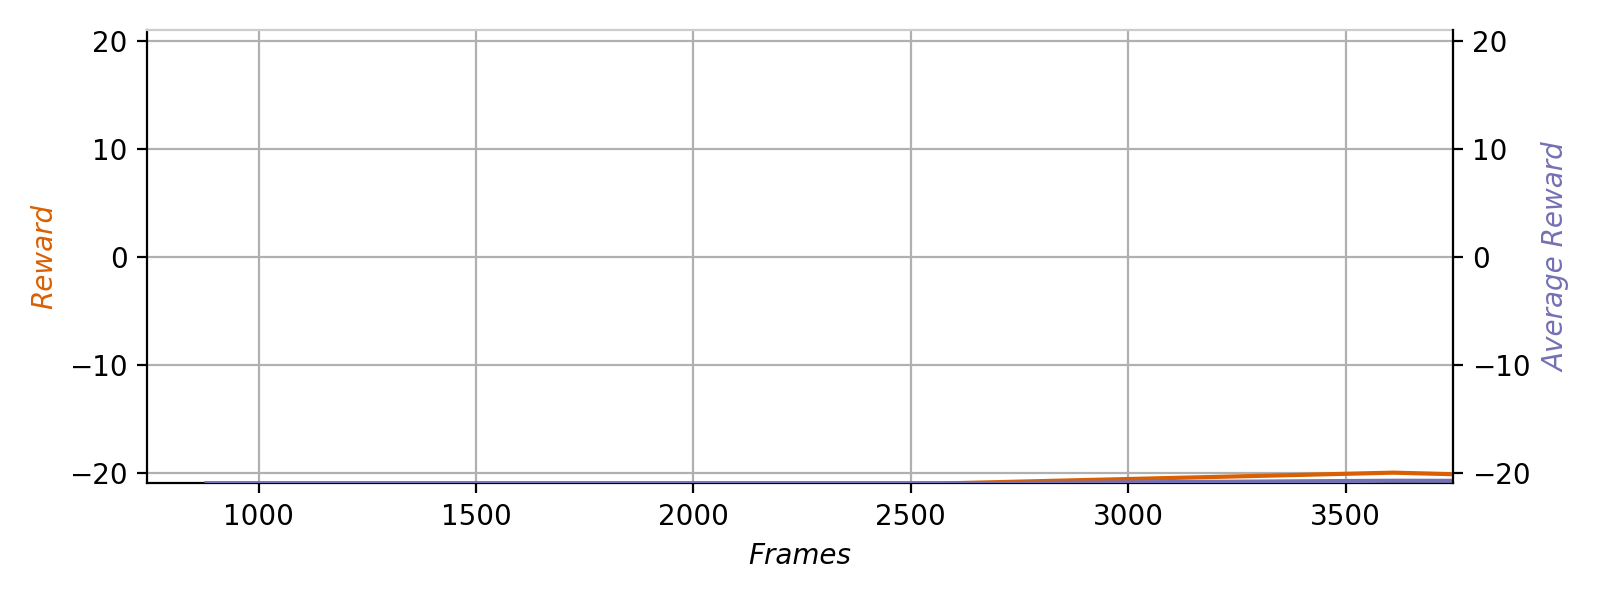

In [102]:
%matplotlib notebook
import tensorwatch as tw
import time

# streams will be stored in test.log file
client = tw.WatcherClient()

# create a stream for logging
stream = client.create_stream(expr='lambda d: (d.frames, d.episode_score)')

line_plot = tw.Visualizer(stream, vis_type='line', xtitle="Frames", ytitle="Reward", yrange=(-21,21))
line_plot.show()

In [103]:
avg_stream = client.create_stream(expr='lambda d:(d.frames, d.total_score/d.episode)')
avg_plot = tw.Visualizer(avg_stream, vis_type='line', host=line_plot, xtitle='Frames', ytitle='Average Reward', yrange=(-21,21))
avg_plot.show()

In [85]:
from models import Qnet
q = Qnet(84,84,4,4)
tw.model_stats(q,[1,4,84,84])

,module name,input shape,output shape,params,memory(MB),MAdd,Flops,MemRead(B),MemWrite(B),duration[%],MemR+W(B)
0,conv1,4 84 84,32 20 20,8224.0,0.05,"6,553,600.0","3,289,600.0",145792.0,51200.0,11.53%,196992.0
1,bn1,32 20 20,32 20 20,64.0,0.05,"51,200.0","25,600.0",51456.0,51200.0,11.96%,102656.0
2,conv2,32 20 20,64 9 9,32832.0,0.02,"5,308,416.0","2,659,392.0",182528.0,20736.0,11.20%,203264.0
3,bn2,64 9 9,64 9 9,128.0,0.02,"20,736.0","10,368.0",21248.0,20736.0,11.97%,41984.0
4,conv3,64 9 9,64 7 7,36928.0,0.01,"3,612,672.0","1,809,472.0",168448.0,12544.0,11.19%,180992.0
5,bn3,64 7 7,64 7 7,128.0,0.01,"12,544.0","6,272.0",13056.0,12544.0,11.92%,25600.0
6,head.0,3136,512,1606144.0,0.00,"3,210,752.0","1,605,632.0",6437120.0,2048.0,11.06%,6439168.0
7,head.1,512,512,0.0,0.00,512.0,512.0,2048.0,2048.0,8.63%,4096.0
8,head.2,512,4,2052.0,0.00,"4,092.0","2,048.0",10256.0,16.0,10.54%,10272.0
total,,,,1686500.0,0.17,"18,774,524.0","9,408,896.0",10256.0,16.0,100.00%,7205024.0


In [1]:
with open('log/dqn.out', 'r') as f:
    lines = f.readlines()
lines = lines[1:] # strip model loading line
new_lines = []
for i in range(0,len(lines)-1,2):
    # strip and join every two lines
    new_line = ', '.join([lines[i].strip(), lines[i+1].strip()])
    new_lines.append(new_line)

In [2]:
def convert_line_to_dict(line):
    out_dict = {}
    lines = [l.strip() for l in line.split(',')]
    for kv in lines:
        k,v = kv.split(':')
        k=k.strip()
        v=v.strip()
        out_dict[k] = float(v.replace('%',''))
    return out_dict

dicts = []
for each_line in new_lines:
    dicts.append(convert_line_to_dict(each_line))

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
#stats = pd.read_csv('log/dqn.out', header=None)
df = pd.DataFrame(dicts)
df.tail()

,n_episode,Average Score,Episode Score,Best Score,n_buffer,eps,Total Frames
1578,1579.0,16.8,20.0,21.0,100000.0,2.0,2970803.0
1579,1580.0,16.8,16.0,21.0,100000.0,2.0,2972811.0
1580,1581.0,16.8,21.0,21.0,100000.0,2.0,2974583.0
1581,1582.0,16.8,20.0,21.0,100000.0,2.0,2976281.0
1582,1583.0,16.8,21.0,21.0,100000.0,2.0,2977928.0


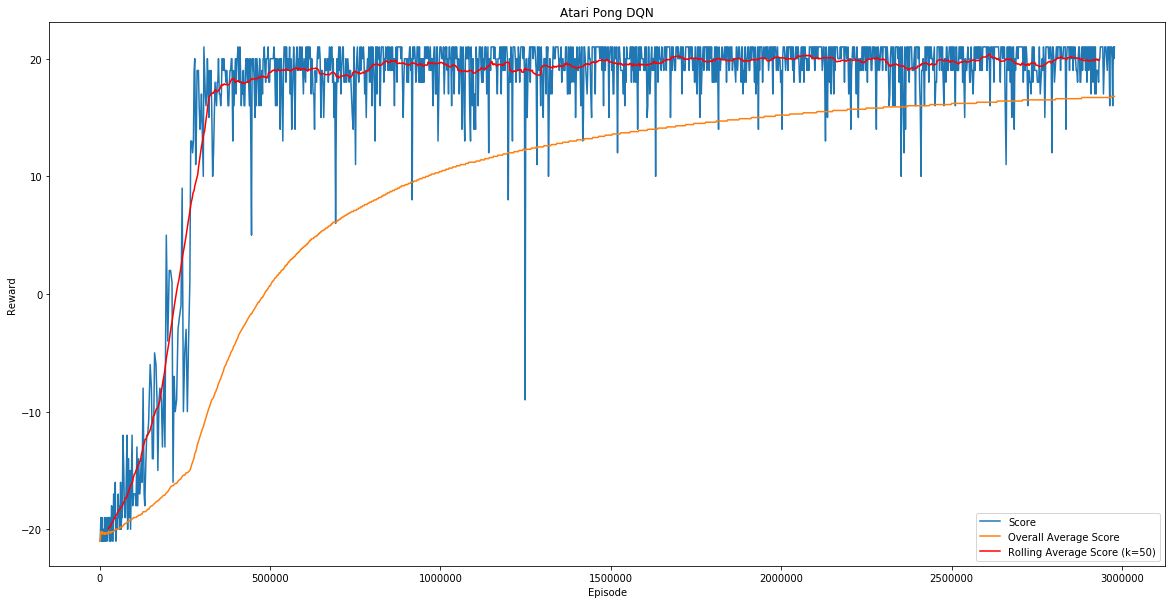

In [15]:
rolling_df = df.rolling(50).mean()
plt.figure(figsize=(20,10))
plt.plot(df['Total Frames'], df['Episode Score'])
plt.plot(df['Total Frames'], df['Average Score'])
plt.plot(rolling_df['Total Frames'], rolling_df['Episode Score'], color='red')
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Atari Pong DQN")
plt.legend(['Score','Overall Average Score', 'Rolling Average Score (k=50)'])
plt.show()